# Setup
## Downloading Packages

In [1]:
# To install the kaggle package in the notebook WARNING Installs System wide
# Download API key from Kaggle from Accounts - Create New Api Token
# Move the downloaded kaggle.json to ~/.kaggle/

# import sys
# !{sys.executable} -m pip install kaggle

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm

color = sns.color_palette()
%matplotlib inline

## Downloading Instacart data using the Kaggle API
Unzipping and Cleaning CSV zip files

In [2]:
# Downloading CSV data, unzipping and moving to csv_src folder

# After isntalling the kaggle module and setting kaggle.json api keys
# Download the dataset from the Kaggle
!kaggle competitions download -c instacart-market-basket-analysis

# Custom shell script to unzip all files, remove zips and move csv into csv_src
# The unzip_rm.sh script should be in the same directory as the python notebook file
!chmod u+x unzip_rm.sh
!./unzip_rm.sh

  0%|                                                 | 0.00/804 [00:00<?, ?B/s]
100%|███████████████████████████████████████████| 804/804 [00:00<00:00, 362kB/s]
  0%|                                               | 0.00/1.87k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.87k/1.87k [00:00<00:00, 578kB/s]
100%|██████████████████████████████████████| 6.90M/6.90M [00:00<00:00, 8.03MB/s]

100%|████████████████████████████████████████| 795k/795k [00:00<00:00, 7.88MB/s]

 99%|█████████████████████████████████████▋| 31.0M/31.3M [00:04<00:00, 8.21MB/s]
100%|██████████████████████████████████████| 31.3M/31.3M [00:04<00:00, 7.69MB/s]
100%|███████████████████████████████████████▉| 157M/157M [00:21<00:00, 8.23MB/s]
100%|████████████████████████████████████████| 157M/157M [00:21<00:00, 7.78MB/s]
  0%|                                                | 0.00/220k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 220k/220k [00:00<00:00, 10.5MB/s]
Archive:  aisles.csv.zip
 

## Loading CSV files into DataFrames

In [2]:
# Reading all the datasets from the csv_src folder
csv_folder = 'csv_src/'
#aisle = pd.read_csv( csv_folder+'aisles.csv')
orders = pd.read_csv(csv_folder+'orders.csv')
products = pd.read_csv(csv_folder+'products.csv')
departments = pd.read_csv( csv_folder+'departments.csv')
order_prior = pd.read_csv(csv_folder+'order_products__prior.csv') 
#order_train = pd.read_csv(csv_folder+'order_products__train.csv')

## Setting the ids as index
#### Setting NAs to zeros

In [4]:
# Setting the correct indexes for the data sets

orders.set_index('order_id', inplace=True)
products.set_index('product_id', inplace=True)
aisle.set_index('aisle_id', inplace=True)
departments.set_index('department_id', inplace=True)
orders = orders.fillna(0) # Setting the NaNs to 0. i.e. sets the days since order to 0 for 1st orders

In [5]:
#Define orders that are a smaller subset for faster loading. We randomize to eliminate bias.
orders = orders.sample(frac=1).reset_index(drop=True)
orders1000 = orders.iloc[:1000,:]
orders100000 = orders.iloc[:100000:,:]
print(len(orders1000))
print(len(orders100000))

1000
100000


In [6]:
orders.head()

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,105119,prior,15,3,8,15.0
1,82673,prior,4,6,18,14.0
2,158884,prior,12,3,17,6.0
3,34070,prior,8,5,21,7.0
4,71877,prior,27,2,9,21.0


In [7]:
products.head()

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


In [8]:
departments.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [9]:
aisle.head()

,aisle
aisle_id,
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation


In [10]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Joining the products dframe with departments and aisle dframes

In [12]:
# Doing left joins on the products and the departments and the aisle by the department_id and aisle_id respectively
product_comb = products.reset_index().set_index('department_id').join(departments)
product_comb = product_comb.reset_index().set_index('aisle_id').join(aisle)

In [13]:
# Setting the index to 'product_id' and sorting it
product_comb = product_comb.reset_index().set_index('product_id')
product_comb.sort_index(axis=0, ascending=True, kind='quicksort', inplace=True)

In [14]:
product_comb.head()

,aisle_id,department_id,product_name,department,aisle
product_id,,,,,
1,61,19,Chocolate Sandwich Cookies,snacks,cookies cakes
2,104,13,All-Seasons Salt,pantry,spices seasonings
3,94,7,Robust Golden Unsweetened Oolong Tea,beverages,tea
4,38,1,Smart Ones Classic Favorites Mini Rigatoni Wit...,frozen,frozen meals
5,5,13,Green Chile Anytime Sauce,pantry,marinades meat preparation


## Are certain departments more popular over time?

In [15]:
orders

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,105119,prior,15,3,8,15.0
1,82673,prior,4,6,18,14.0
2,158884,prior,12,3,17,6.0
3,34070,prior,8,5,21,7.0
4,71877,prior,27,2,9,21.0
5,165353,prior,3,5,8,7.0
6,171363,prior,4,0,17,19.0
7,106827,prior,6,4,16,30.0
8,150367,prior,30,0,17,2.0
9,188417,prior,33,0,12,12.0


In [16]:
def hist_count_plots(dframe, x_axis, _title, _xlabel, _ylabel, color_index ):
    plt.figure(figsize=(10,8))
    sns.countplot(x=x_axis, data=dframe, color=color[color_index])
    plt.title(_title, fontsize=16)
    plt.xlabel(_xlabel, fontsize=13)
    plt.ylabel(_ylabel, fontsize=13)
    
    if x_axis == "order_dow":
        plt.xticks([0,1,2,3,4,5,6],["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

    plt.show()

In [ ]:
#Check the distribution of plots
hist_count_plots( orders, 'user_id', 'user id counts', "users", "number of orders", 2 )

In [1]:
#Sorted distribution.

def hist_count_plots_distribution(dframe, x_axis, _title, _xlabel, _ylabel, color_index ):
    plt.figure(figsize=(10,8))
    sns.countplot(x=x_axis, data=dframe, order=dframe['user_id'].value_counts().index, color=color[color_index])
    plt.title(_title, fontsize=16)
    plt.xlabel(_xlabel, fontsize=13)
    plt.ylabel(_ylabel, fontsize=13)

    plt.show()

In [ ]:
#Sorted distribution.
hist_count_plots_distribution( orders, 'user_id', 'user id counts', "users", "number of orders", 2 )

## Looking at Order Frequency by the hour of the day

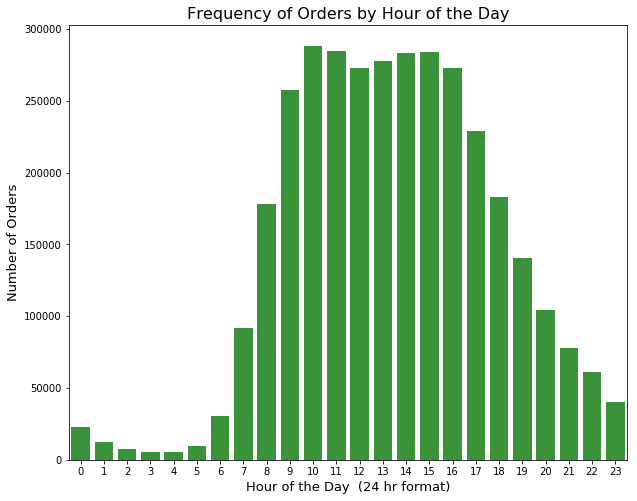

In [16]:
hist_count_plots(orders ,"order_hour_of_day", "Frequency of Orders by Hour of the Day",
                 "Hour of the Day  (24 hr format)", "Number of Orders", 2)

## Looking at Order Frequency by the days of the Week

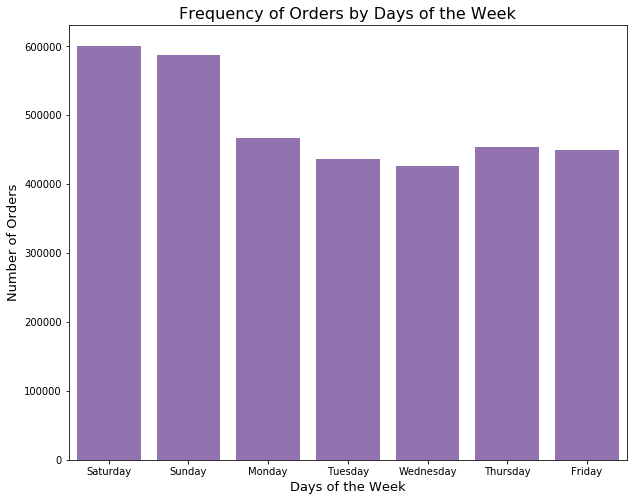

In [67]:
hist_count_plots(orders, "order_dow", "Frequency of Orders by Days of the Week",
                 "Days of the Week", "Number of Orders", 4)

## Continuous bivariate density of orders between day of the week and hour of the day

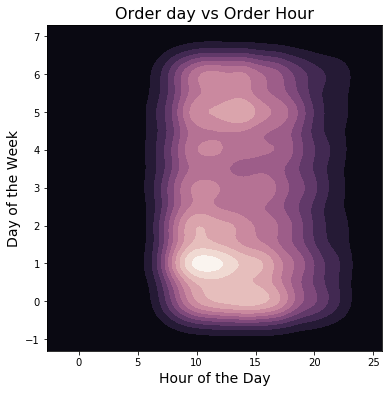

In [18]:
smallset = orders[0:10000]

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(smallset.order_hour_of_day, smallset.order_dow, cmap=cmap, n_levels=15, shade=True);
plt.title("Order day vs Order Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Day of the Week", fontsize=14)
plt.show()

In [19]:
orders.head()

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,0.0
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0


In [11]:
print(order_prior)

          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
5                2       17794                  6          1
6                2       40141                  7          1
7                2        1819                  8          1
8                2       43668                  9          0
9                3       33754                  1          1
10               3       24838                  2          1
11               3       17704                  3          1
12               3       21903                  4          1
13               3       17668                  5          1
14               3       46667                  6          1
15               3      

# Distribution of departments and reorder rates.

We are interested to see if certain departments are the first items or last items to be ordered. 

This could affect which items we want to be showing in marketing materials

Perhaps people who order these items then go on to order more items


In [121]:
#We check if certain departments have higher reorder rates. 
#Do inner join betwee the orders and the product table to get product department
MergedProductsDatabase = order_prior.merge(products, left_on='product_id', right_on='product_id', how='inner')[['department_id', 'add_to_cart_order']]
#Inner join to get the department name attached
MergedProductsDatabase = MergedProductsDatabase.merge(departments, left_on = 'department_id', right_on='department_id', how='inner')[['department', 'add_to_cart_order']]

In [122]:
#What's the mean item number in the customer cart is items from each department
MergedProductsDatabaseMean = MergedProductsDatabase.groupby(['department'],as_index=False).mean().sort_values(by=['add_to_cart_order'])
print(MergedProductsDatabaseMean)
MergedProductsDatabaseMean.describe()

         department  add_to_cart_order
0           alcohol           5.428346
3         beverages           6.976699
7        dairy eggs           7.495423
18             pets           7.718544
19          produce           8.022875
2            bakery           8.084397
15            other           8.277645
5              bulk           8.399040
11        household           8.492163
13     meat seafood           8.528225
8              deli           8.693815
17    personal care           8.752753
10           frozen           8.996414
4         breakfast           9.124044
20           snacks           9.187743
14          missing           9.339489
16           pantry           9.593425
12    international           9.947061
6      canned goods           9.947258
9   dry goods pasta          10.212863
1            babies          10.575925


,add_to_cart_order
count,21.000000
mean,8.656864
std,1.180297
min,5.428346
25%,8.084397
50%,8.693815
75%,9.339489
max,10.575925


In [123]:
#What's the average item number in the customer cart is items from each department
MergedProductsDatabaseMedian = MergedProductsDatabase.groupby(['department'],as_index=False).median().sort_values(by=['add_to_cart_order'])
print(MergedProductsDatabaseMedian)

         department  add_to_cart_order
0           alcohol                  3
3         beverages                  5
18             pets                  6
2            bakery                  6
5              bulk                  6
15            other                  6
7        dairy eggs                  6
19          produce                  6
11        household                  6
17    personal care                  7
14          missing                  7
13     meat seafood                  7
10           frozen                  7
8              deli                  7
4         breakfast                  7
20           snacks                  7
9   dry goods pasta                  8
6      canned goods                  8
16           pantry                  8
12    international                  8
1            babies                  9


In [124]:
#Place code to construct graph here.
def vbar_plots_cartpositions(dframe1,dframe2, x_axis, _title, _xlabel, _ylabel, color_index):
    plt.figure(figsize=(10,5))
    plt.grid(True)
    sns.barplot(dframe1.iloc[:,0],dframe1.iloc[:,1],color="blue", alpha=0.5,saturation=.7, label='Median position')
    sns.barplot(dframe2.iloc[:,0],dframe2.iloc[:,1],color="green", alpha=0.5,saturation=.7, label = 'Mean position')
    plt.legend(loc='upper left')
    plt.title(_title, fontsize=16)
    plt.xlabel(_xlabel, fontsize=13)
    plt.ylabel(_ylabel, fontsize=13)
    plt.xticks( rotation=70, fontsize=13)
    plt.show()

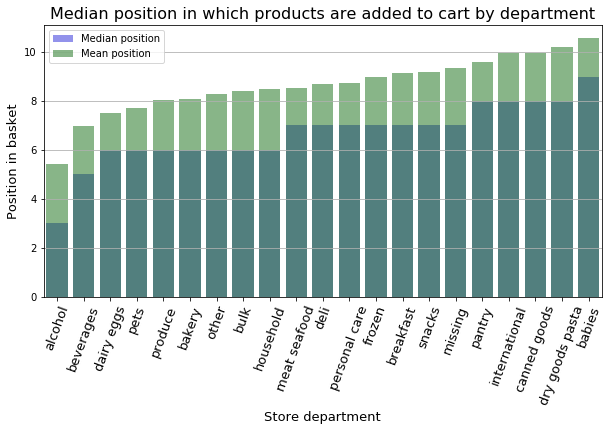

In [125]:
vbar_plots_cartpositions(MergedProductsDatabaseMedian,MergedProductsDatabaseMean, 'department', 'Median position in which products are added to cart by department','Store department','Position in basket', 2)

## Do certain departments get more popular as the number of days since last order increases.

This can affect which products from which departments to show after X number of days since the customer visited the site. 

In [3]:
#Inner join the orders items to get the product ID
#Since we inner join on the order id and not other values we need to consider validity. 
MergedProductsDatabase = order_prior.merge(orders[(orders.days_since_prior_order >= 0) & (orders.days_since_prior_order <= 31)], left_on='order_id', right_on='order_id', how='inner')[['days_since_prior_order', 'product_id']]


#Inner join with products table to obtain department ID.
MergedProductsDatabase = MergedProductsDatabase.merge(products, left_on='product_id', right_on='product_id', how='inner')[['days_since_prior_order', 'department_id']]

#Inner join with departments table to obtain department Name from ID.
MergedProductsDatabase = MergedProductsDatabase.merge(departments, left_on='department_id', right_on='department_id', how='inner')[['days_since_prior_order', 'department']]
print(MergedProductsDatabase)

          days_since_prior_order  department
0                            8.0  dairy eggs
1                            7.0  dairy eggs
2                           10.0  dairy eggs
3                            8.0  dairy eggs
4                            9.0  dairy eggs
5                            3.0  dairy eggs
6                           10.0  dairy eggs
7                           12.0  dairy eggs
8                            3.0  dairy eggs
9                            3.0  dairy eggs
10                           7.0  dairy eggs
11                           7.0  dairy eggs
12                           3.0  dairy eggs
13                           8.0  dairy eggs
14                           6.0  dairy eggs
15                           8.0  dairy eggs
16                           9.0  dairy eggs
17                          20.0  dairy eggs
18                           3.0  dairy eggs
19                          10.0  dairy eggs
20                           9.0  dairy eggs
21        

In [4]:

#First stores the day, second stores a list of department. Third stores a value.
#This is where each day's data will be stored
priorOrderDay = [0]*31
#Each day will have a department list that contains the headers and it's respective number of occurances
department_list = [departments.department.unique().tolist(), [0]*len(departments.department.unique())]

for day in range(31):
    #This kaggle dataset only reaches 31 days. It's likely truncated
    thisDay = MergedProductsDatabase[(MergedProductsDatabase.days_since_prior_order == day)]
    #We select this day and save it's occurances into the departmentList's number of occurances section.
    for row in thisDay.itertuples():
        department_list[1][department_list[0].index(row.department)] += 1
    priorOrderDay[day] = department_list
    department_list = [departments.department.unique().tolist(), [0]*len(departments.department.unique())]


In [5]:
def line_departmentOrderDay( orderDayList, _title, _xlabel, _ylabel):
    plt.figure(figsize=(20,15))
    plt.grid(True)
#    sns.plot(dframe1.iloc[:,0],dframe1.iloc[:,1],color="blue", alpha=0.5,saturation=.7, label='Median position')
    
    itemsDayArray = {}
    itemList = departments.department.unique().tolist() 
    
    #Initialize the items day array so we can append new values.
    for item in itemList:
        itemsDayArray[item] = []


    for day in orderDayList:
        for i in range(len(itemList)):
            #Append new value for this item for this day onto the itemsDayArray so we can divide it up by date.
            itemsDayArray[day[0][i]].append(day[1][i])
    
    for item in itemList:
        plt.plot(list(range(31)), itemsDayArray[item], label =item)

    plt.xticks( rotation=70, fontsize=13)
    plt.legend(loc='upper left')
    plt.title(_title, fontsize=16)
    plt.xlabel(_xlabel, fontsize=13)
    plt.ylabel(_ylabel, fontsize=13)
    plt.show()

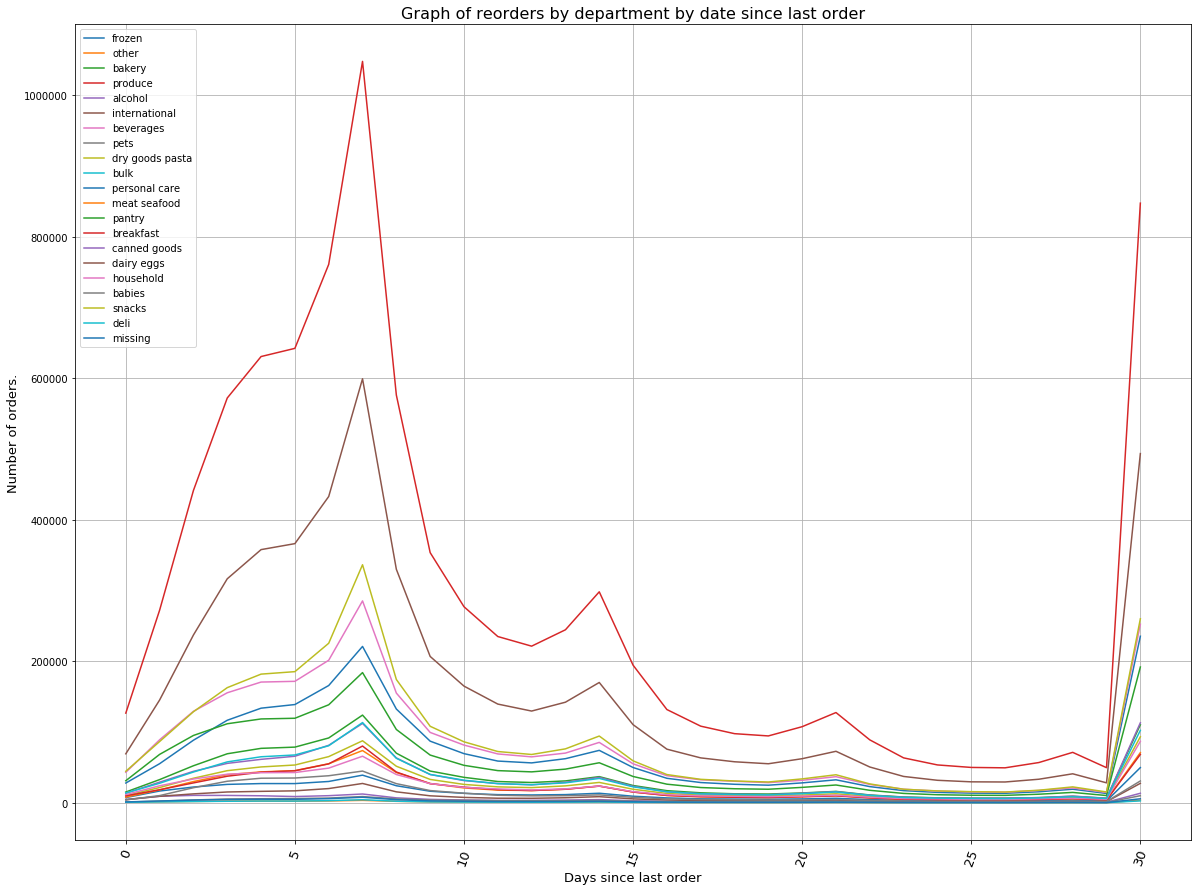

In [6]:

line_departmentOrderDay(priorOrderDay,'Graph of reorders by department by date since last order', 'Days since last order', 'Number of orders.')

### We don't see much of a difference between each individual product since the large scale fluctuations  in number of orders between days overpowers the perhaps smaller difference between which items are popular. So, we now attempt to plot the ratio rather than the absolute amount

In [7]:
#We now plot by the percentage (ratio) of each line. This should give us a better idea of which items
#Become more popular as we go along

def line_departmentOrderDayPct( orderDayList, _title, _xlabel, _ylabel):
    plt.figure(figsize=(20,15))
    plt.grid(True)
#    sns.plot(dframe1.iloc[:,0],dframe1.iloc[:,1],color="blue", alpha=0.5,saturation=.7, label='Median position')
    
    itemsDayArray = {}
    itemList = departments.department.unique().tolist() 
    
    #Initialize the items day array so we can append new values.
    for item in itemList:
        itemsDayArray[item] = []
        
    for day in orderDayList:
        #Calculate the total amount of orders so we can then determine the ratio
        sum = 0
        for i in range(len(itemList)):
            sum += day[1][i]
        for i in range(len(itemList)):
            #Adds the total ratio into the dictionary
            itemsDayArray[day[0][i]].append(day[1][i]/sum)
    
    #Plots each item on the graph. Mark the label as the name of this item
    for item in itemList:
        plt.plot(list(range(31)), itemsDayArray[item], label =item)

    plt.xticks( rotation=70, fontsize=13)
    #Set the legend so we can identify which line
    plt.legend(loc='upper left')
    plt.title(_title, fontsize=16)
    plt.xlabel(_xlabel, fontsize=13)
    plt.ylabel(_ylabel, fontsize=13)
    plt.show()

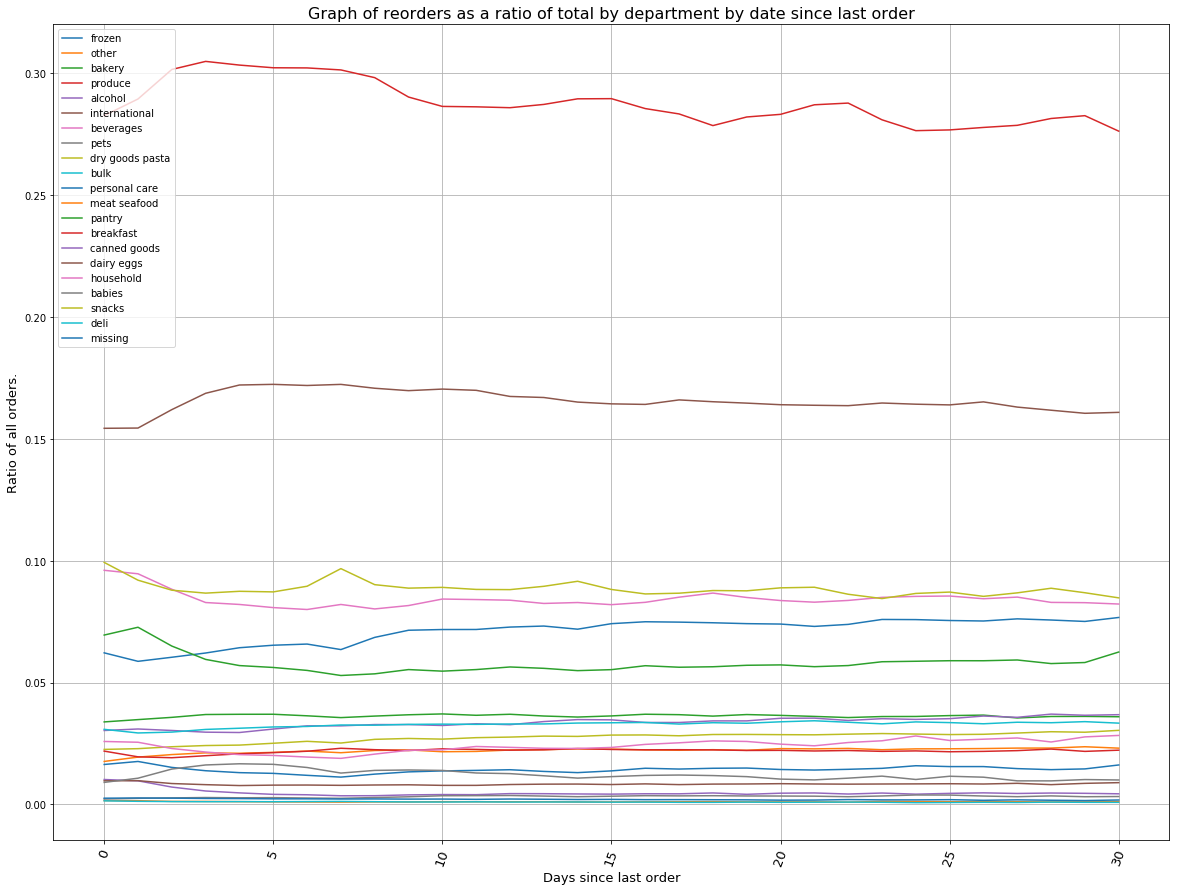

In [8]:
line_departmentOrderDayPct(priorOrderDay,'Graph of reorders as a ratio of total by department by date since last order', 'Days since last order', 'Ratio of all orders.')

Now we calculate the regression for some of these values. Our original hypothesis was to see if higher last order days would result in certain departments being less common. (People who order every 25 days might get less consumables)?

In [14]:
def regressionCalc(orderDayList,departmentName):

    itemsDayArray = {}
    itemList = departments.department.unique().tolist() 
    
    #Initialize the items day array so we can append new values.
    for item in itemList:
        itemsDayArray[item] = []
        
    for day in orderDayList:
        #Calculate the total amount of orders so we can then determine the ratio
        sum = 0
        for i in range(len(itemList)):
            sum += day[1][i]
        for i in range(len(itemList)):
            #Adds the total ratio into the dictionary
            itemsDayArray[day[0][i]].append(day[1][i]/sum)
    
    #Stats models refrenced from http://www.statsmodels.org/devel/examples/notebooks/generated/formulas.html
    selected = pd.DataFrame({"departmentRatio": itemsDayArray[departmentName], "Days": list(range(31))})
    result = sm.ols(formula="departmentRatio ~ Days", data=selected).fit()
    print(result.summary())


In [17]:
regressionCalc(priorOrderDay, 'produce')

                            OLS Regression Results                            
Dep. Variable:        departmentRatio   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     43.04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           3.47e-07
Time:                        04:51:47   Log-Likelihood:                 117.31
No. Observations:                  31   AIC:                            -230.6
Df Residuals:                      29   BIC:                            -227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2988      0.002    149.863      0.0

### We calculate the regression statistic and find that while R squared seems to be high, which suggests that there is a strong correlation between the ratio of produce and the time since last ordered, however, the F statistic is very big. This suggests that there is a very large probability that the data is not explained by our hypothesis but rather by external factors

Lets do it for a few more departments

In [18]:
regressionCalc(priorOrderDay, 'dairy eggs')

                            OLS Regression Results                            
Dep. Variable:        departmentRatio   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.145
Date:                Fri, 21 Dec 2018   Prob (F-statistic):              0.154
Time:                        04:51:51   Log-Likelihood:                 124.64
No. Observations:                  31   AIC:                            -245.3
Df Residuals:                      29   BIC:                            -242.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1673      0.002    106.301      0.0

In [19]:
regressionCalc(priorOrderDay, 'canned goods')

                            OLS Regression Results                            
Dep. Variable:        departmentRatio   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     263.0
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           4.41e-16
Time:                        04:52:15   Log-Likelihood:                 183.07
No. Observations:                  31   AIC:                            -362.1
Df Residuals:                      29   BIC:                            -359.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0303      0.000    126.732      0.0

We see similar patters, either super low R squared or very high F statistics. It appears that our hypothesis was not quite correct